# Ratings Prediction Project

### Introduction
> This project is related a website where people write different reviews for technical products. Now a new feature has been added to website i.e., the reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now the requirement is to predict ratings for the reviews which were written in the past for which website don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

### About Dataset
Data has been collected from different e-commerce website(s) and stored in .CSV (Comma Seperated Values) format which consists of **31585 records with 3 features** as follow:
1. **`Ratings:`** Rating of the product i.e., 1, 2, 3, 4, & 5.
2. **`Review Title:`** Title for the review.
3. **`Review Description:`** Description of review.

### Required Libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

#suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
#loading dataset
df_rr = pd.read_csv('ratings-reviews-dataset.csv',index_col=0)

#interpreting dataset
df_rr

,Ratings,Review Titles,Review Descriptions
0,3,Nice,"By the way, everything is good in a laptop, bu..."
1,5,Wonderful,Best laptop for students
2,1,Did not meet expectations,"Totally worthless, not even real d-link router..."
3,3,Good,As expected ...value for money...little slow b...
4,5,Simply awesome,Great great great product in this price
...,...,...,...
31580,2,HP415_Gr3,Bit disappointed with print quality. The defau...
31581,3,NOTHING,NOTHING
31582,4,Worth the money,This modem is actually pretty good.
31583,5,Worth every penny,Writing the review after 2 days of use... disp...


#### Remarks:
- There are **31585 records with 3 features** present.
- Since, the feature `Review Titles` and `Review Descriptions` are denoted same thing i.e., `Review Texts` therefore, these features can be merged to a single feature.

## Data Analysis: Cleaning & Preparation

In [3]:
#copying dataframe to another dataframe object
df = df_rr.copy()

#Merging feature Review Titles and Review Descriptions to Review Titles
df['review_text'] = df['Review Titles'].apply(lambda x: str(x)+" ") + df['Review Descriptions']

#Rename column Ratings to rating
df.rename(columns={'Ratings':'rating'},inplace=True)

#Dropping feature Review Titles and Review Descriptions as these are already merged into review_text
df.drop(columns=['Review Titles','Review Descriptions'],inplace=True)

#interpreting first 5 rows of new dataset
df.head()

,rating,review_text
0,3,"Nice By the way, everything is good in a lapto..."
1,5,Wonderful Best laptop for students
2,1,"Did not meet expectations Totally worthless, n..."
3,3,Good As expected ...value for money...little s...
4,5,Simply awesome Great great great product in th...


In [4]:
#checking general informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31585 entries, 0 to 31584
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       31585 non-null  int64 
 1   review_text  31530 non-null  object
dtypes: int64(1), object(1)
memory usage: 740.3+ KB


#### Remarks:
- There are two features out of which one is of int type and other is object type.
- Non-Null Count suggests there are some null values present in feature review_text.

In [5]:
#checking null values
df.isnull().sum()

rating          0
review_text    55
dtype: int64

In [6]:
#dropping null values rows
df.dropna(inplace=True)

In [7]:
#checking shape of dataset
print(f"Original Shape: {df_rr.shape}")
print(f"New Shape: {df.shape}")

Original Shape: (31585, 3)
New Shape: (31530, 2)


In [8]:
#converting all the review_text to lowercase
df.review_text = df.review_text.str.lower()

#interpreting first 5 rows
df.head()

,rating,review_text
0,3,"nice by the way, everything is good in a lapto..."
1,5,wonderful best laptop for students
2,1,"did not meet expectations totally worthless, n..."
3,3,good as expected ...value for money...little s...
4,5,simply awesome great great great product in th...


#### Remark:
- All the review text has been converted to lowercase.

# Exploratory Data Analysis (EDA) & Visualization

### 1. Univariate Analysis

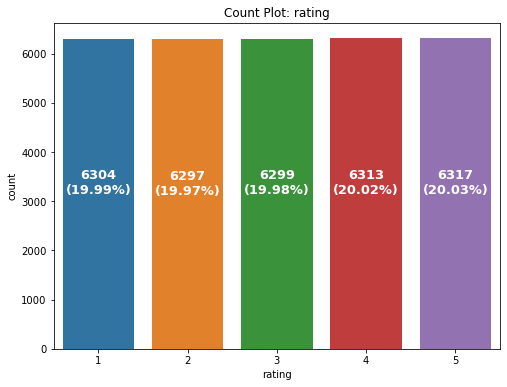

In [9]:
#checking feature rating using count plot
x = 'rating'
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

#### Remarks:
- There are almost equal number of records are availble for all ratings i.e. from 1 to 5.

#### Checking Distribution of Review Text length for each rating using distribution plot

In [10]:
#adding a new column length for review text length
df['length'] = df.review_text.str.len()

#interpreting first 5 rows
df.head()

,rating,review_text,length
0,3,"nice by the way, everything is good in a lapto...",121
1,5,wonderful best laptop for students,34
2,1,"did not meet expectations totally worthless, n...",536
3,3,good as expected ...value for money...little s...,77
4,5,simply awesome great great great product in th...,54


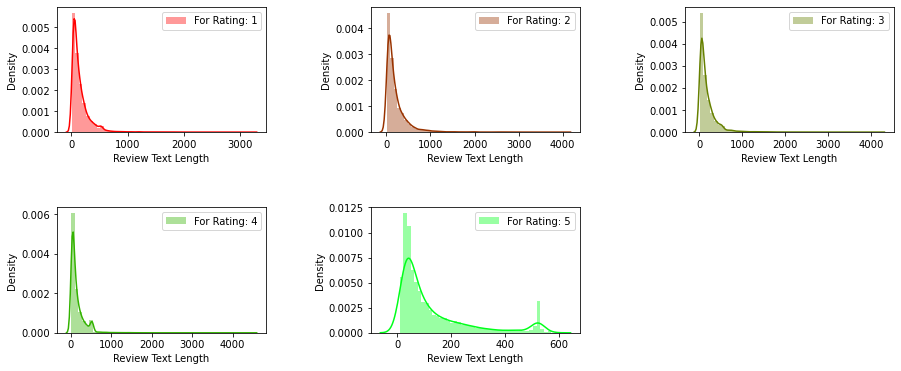

In [11]:
#checking review text length distribution for each rating
ratings = np.sort(df.rating.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.length[df.rating==i],ax=axis,label=f"For Rating: {i}",color=colors[i-1])
    axis.set_xlabel(f"Review Text Length")
    axis.legend()
    p += 1
    
plt.show()

#### Remarks:
- Rating 2, 3, 4 has almost similer review text length and higher than Rating 1 and 5.
- Rating 5 has lowest review text lengths.

### Removing and Replacing certain terms using `Regular Expression`

In [12]:
# Replace money sysmbols with 'dollars' Euro symbol: Alt + 156
df.review_text = df.review_text.str.replace(r'₹|\£|\$','dollars')

# Replace number with 'numbr'
df.review_text = df.review_text.str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
df.review_text = df.review_text.str.replace(r'[^\w\d\s]',' ')

# Replace white space between term with single space
df.review_text = df.review_text.str.replace(r'\s+',' ')

# Remove leading and trailing whitespaces
df.review_text = df.review_text.str.replace(r'^\s+|\s+?$','')

In [13]:
#interpreting first 5 rows
df.head()

,rating,review_text,length
0,3,nice by the way everything is good in a laptop...,121
1,5,wonderful best laptop for students,34
2,1,did not meet expectations totally worthless no...,536
3,3,good as expected value for money little slow b...,77
4,5,simply awesome great great great product in th...,54


### Remove Stop Words

In [14]:
#setting stop words
stop_words = set(stopwords.words('english') + ['u','ur','ure','im','gd','dont','doin'])

#removing stop words
df.review_text = df.review_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [15]:
#Adding new column clean_length for review_text length after cleaning
df['clean_length'] = df.review_text.str.len()

#Interpreting first 5 rows
df.head()

,rating,review_text,length,clean_length
0,3,nice way everything good laptop numbrgb ram in...,121,81
1,5,wonderful best laptop students,34,30
2,1,meet expectations totally worthless even real ...,536,358
3,3,good expected value money little slow price good,77,48
4,5,simply awesome great great great product price,54,46


In [16]:
#Checking the difference between original review text length and cleaned length
print(f"Orignal Review Text Length: {df.length.sum()}")
print(f"Cleaned Review Text Length: {df.clean_length.sum()}")
print(f"Difference: {df.length.sum() - df.clean_length.sum()}")

Orignal Review Text Length: 5196793
Cleaned Review Text Length: 3686053
Difference: 1510740


#### Remarks:
- Review text length reduced by greater length after removal of stop words and punctuations.

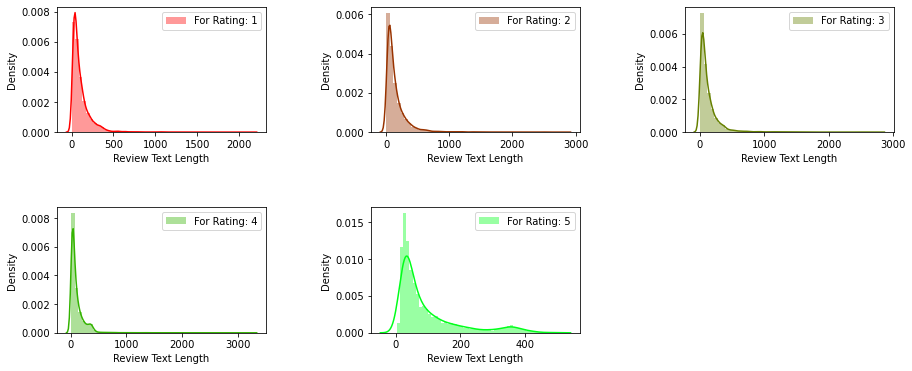

In [17]:
#checking review text length distribution for each rating after cleaning
ratings = np.sort(df.rating.unique())
cols = 3
rows = len(ratings)//cols
if len(ratings) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.clean_length[df.rating==i],ax=axis,label=f"For Rating: {i}",color=colors[i-1])
    axis.set_xlabel(f"Review Text Length")
    axis.legend()
    p += 1

plt.show()

#### Remarks:
- Review text length reduced by almost 1000 characters for Rating 1 to 4 while for Rating 5 it is almost 200 characters

### Displaying with Word Cloud

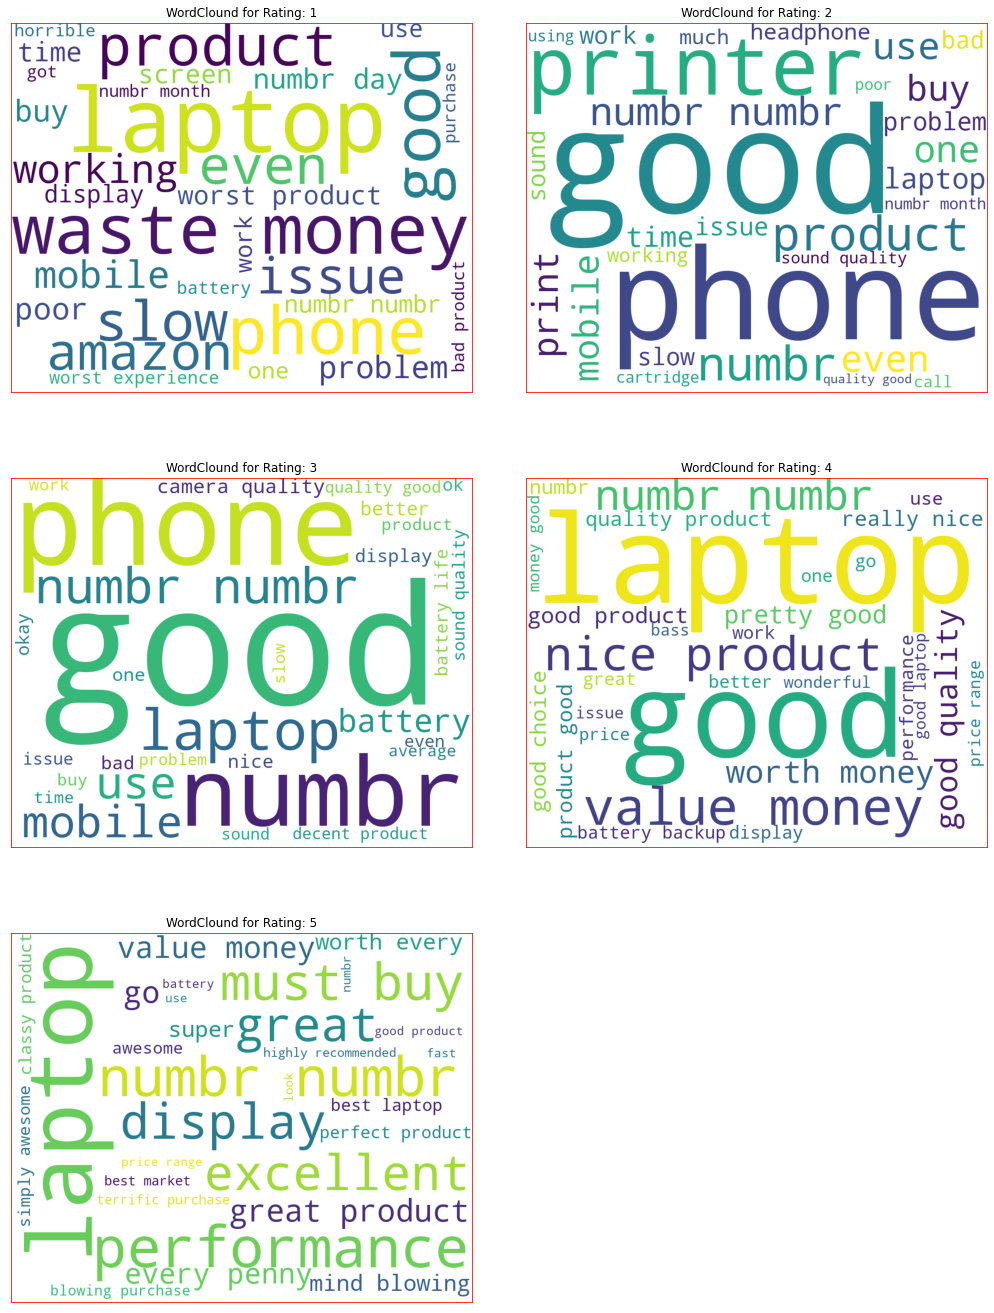

In [18]:
# getting sense of loud word in each rating
cols = 2
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white",max_words=30).generate(' '.join(df.review_text[df.rating==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordClound for Rating: {i}")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1
    
plt.show()

#### Remarks:
**`for Rating: 1`**
- It mostly consists of words like laptop, waste, money, slow, worst, issue, horrible etc.

**`for Rating: 2`**
- It mostly consists of words like phone, good, printer, product, problem, issue, bad, poor, slow etc.

**`for Rating: 3`**
- It mostly consists of words like phone, good, laptop, problem, bad, issue, slow, life, average, nice etc.

**`for Rating: 4`**
- It mostly consists of words like laptop, good, value, money, nice, performance, great, better, wonderful etc.

**`for Rating: 5`**
- It mostly consists of words like laptop, excellent, must buy, great, perfect, super, awesome, mind blowing etc.

#### EDA Concluding Remarks:
> Starting with univariate analysis, with the help of countplot, it was found that the data consists of almost in equal amount for each rating (i.e., from 1 to 5). Moving further with the removal and replacement of certain terms (like, punctuations, extra spaces, numbers, money symbols) as well as removal of stop words, it was evident that the length of review text decreases by a large amount. This was also dipcted by using distribution plot. With the help of wordcloud, it was found that the rating 1 consists of words like waste, money, slow, worst, issue, horrible etc, rating 2 consists of words like problem, issue, bad, poor, slow etc., rating 3 consists of word like problem, bad, issue, slow, life, average, nice etc, rating 4 consists of word like good, value, money, nice, performance, great, better, wonderful etc. and rating 5 consists of words like excellent, must buy, great, perfect, super, awesome, mind blowing etc.

# Preparing Data for Model Training & Testing

In [19]:
#importing required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tqdm.notebook as tqdm
import sys, timeit
from IPython.display import display

### 1. Convert Text into Vectors

In [20]:
#converting text into vectors using TF-IDF
tfidf = TfidfVectorizer()

#vectorizing text features
features = tfidf.fit_transform(df.review_text)

### 2. Seperating Input and Output variables

In [21]:
#Input Variable
X = features

#Output Variable
Y = df.rating

### 3. Training & Testing Model

In [22]:
#function to get best random state
def get_best_random_state(model,X,Y,t_size=0.25,rs_range=range(1,301,50)):
    best_rstate = 0
    best_accuracy_score = 0
    random_state_message = "\r"
    
    for i in tqdm.tqdm(rs_range,desc=f"Best_Random_State => {model}"):
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=t_size,random_state=i)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        a_score = accuracy_score(Y_test,y_pred)
        
        if a_score > best_accuracy_score:
            best_accuracy_score = a_score
            best_rstate = i
            
        random_state_message += f"[{i}: {round(a_score*100,2)}]<--->"
        sys.stdout.write(random_state_message)
        
    sys.stdout.write(f"\n\nBest Random State: {best_rstate} found with Accuracy: {best_accuracy_score}")
    return best_rstate, best_accuracy_score
#End of function


#function to get best cv score
def get_best_cv(model,X_train,Y_train,parameters,cv_range=range(5,25,5)):
    best_cv_score = 0
    best_cv = 0
    
    cv_message = "\r"
    for i in tqdm.tqdm(cv_range,desc=f"Best_CV => {model}"):
        gscv = GridSearchCV(model,parameters)
        gscv.fit(X_train,Y_train)
        
        cv_score = cross_val_score(gscv.best_estimator_,X_train,Y_train,cv=i).mean()
        
        if cv_score > best_cv_score:
            best_cv_score = cv_score
            best_cv = i
        
        cv_message += f"[{i}:{round(cv_score*100,2)}]<--->"
        sys.stdout.write(cv_message)
    
    sys.stdout.write(f"\n\nBest CV: {best_cv} found with Cross Val Score: {best_cv_score}")
    
    return best_cv, best_cv_score
#End of function

#function to build models
def build_models(models,X,Y,t_size=0.25,rs_range=range(1,301,50),cv_range=range(5,25,5)):
    for i in tqdm.tqdm(models,desc="Building Models"):
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        #start time
        start_time = timeit.default_timer()
        
        #Find the best random state
        best_random_state, best_accuracy_score = get_best_random_state(models[i]['name'],X,Y,t_size,rs_range)
        sys.stdout.write("\n")
        
        #Spliting train and test data using train_test_split method with best random state value
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=t_size,random_state=best_random_state)
        
        #Find the best CV
        best_cv, best_cv_score = get_best_cv(models[i]['name'],X_train,Y_train,models[i]['parameters'],cv_range)
        sys.stdout.write("\n\nBuilding Model...")
        
        #Training the model using best CV
        gscv = GridSearchCV(models[i]['name'],models[i]['parameters'],cv=best_cv)
        gscv.fit(X_train,Y_train)
        
        #Testing model
        y_pred = gscv.best_estimator_.predict(X_test)
        
        #Recording model performance
        model_accuracy_score = accuracy_score(Y_test,y_pred)
        model_confusion_matrix = confusion_matrix(Y_test,y_pred)
        model_classification_report = classification_report(Y_test,y_pred)
        
        #end time
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        #storing model specifications
        models[i]['initial_accuracy_score'] = best_accuracy_score
        models[i]['best_random_state'] = best_random_state
        models[i]['x_train'] = X_train
        models[i]['x_test'] = X_test
        models[i]['y_train'] = Y_train
        models[i]['y_test'] = Y_test
        models[i]['best_cv'] = best_cv
        models[i]['best_cv_score'] = best_cv_score
        models[i]['gscv'] = gscv
        models[i]['y_predict'] = y_pred
        models[i]['final_accuracy'] = model_accuracy_score
        models[i]['confusion_matrix'] = model_confusion_matrix
        models[i]['classification_report'] = model_classification_report
        models[i]['build_time'] = f"{end_time - start_time} (in sec.)"
        
        sys.stdout.write("\n=======================================================================================\n\n\n")
    
    return models
#End of function

#function to display model performance
def display_performance(models):
    model_names = []
    model_initial_score = []
    model_cross_val_score = []
    model_final_score = []
    model_build_time = []
    for i in models:
        model_names.append(i)
        model_initial_score.append(models[i]['initial_accuracy_score'])
        model_cross_val_score.append(models[i]['best_cv_score'])
        model_final_score.append(models[i]['final_accuracy'])
        model_build_time.append(models[i]['build_time'])
    
    model_df = pd.DataFrame({
        "Name": model_names,
        "Initial Score": model_initial_score,
        "Cross Val Score": model_cross_val_score,
        "Final Score": model_final_score,
        "Build Time": model_build_time,
    })
    
    model_df['Difference (Final Score - Cross Val Score)'] = model_df['Final Score'] - model_df['Cross Val Score']
    display(model_df)
    
    for i in models:
        print("========================================================")
        print(f"for model: {i}")
        print("========================================================")
        print("CLASSIFICATION REPORT")
        print(models[i]['classification_report'])
        print("CONFUSION MATRIX")
        print(models[i]['confusion_matrix'])
        print("=======================================================\n\n")
        
    return
#End of function

In [23]:
#List of models for training & testing
models = {
    "MultinomialNB":{
        "name": MultinomialNB(),
        "parameters":{
            "alpha": [1.0]                
        }
    },
    "SGDClassifier":{
        "name": SGDClassifier(),
        "parameters":{
            "loss":['hinge','modified_huber'],
            "alpha":[0.001,0.0001,0.00001],
            "n_jobs":[-1],
            "learning_rate":['optimal'],
            "max_iter":[100]
        }
    },
    "KNeighborsClassifier":{
        "name": KNeighborsClassifier(),
        "parameters":{
            "n_neighbors": [5,10],
            "weights": ['uniform','distance'],
            "n_jobs": [-1]
        }
    },
    "DecisionTreeClassifier":{
        "name": DecisionTreeClassifier(),
        "parameters":{
            "criterion": ['gini','entropy'],
            "splitter": ['best','random']
        }
    }
}

In [24]:
#building models
build_model = build_models(models,X,Y)

Building Models:   0%|          | 0/4 [00:00<?, ?it/s]


Current Model in Progress: MultinomialNB 


Best_Random_State => MultinomialNB():   0%|          | 0/6 [00:00<?, ?it/s]

[1: 72.87]<--->[51: 73.5]<--->[101: 72.89]<--->[151: 72.65]<--->[201: 72.09]<--->[251: 73.06]<--->

Best Random State: 51 found with Accuracy: 0.7349993657237093


Best_CV => MultinomialNB():   0%|          | 0/4 [00:00<?, ?it/s]

[5:72.43]<--->[10:72.43]<--->[15:72.48]<--->[20:72.41]<--->

Best CV: 15 found with Cross Val Score: 0.7247849265080627

Building Model...Completed in [4.174949800000007 sec.]



Current Model in Progress: SGDClassifier 


Best_Random_State => SGDClassifier():   0%|          | 0/6 [00:00<?, ?it/s]

[1: 74.72]<--->[51: 75.16]<--->[101: 74.05]<--->[151: 74.88]<--->[201: 74.35]<--->[251: 74.78]<--->

Best Random State: 51 found with Accuracy: 0.7516174045414182


Best_CV => SGDClassifier():   0%|          | 0/4 [00:00<?, ?it/s]

[5:74.82]<--->[10:75.09]<--->[15:74.92]<--->[20:74.94]<--->

Best CV: 10 found with Cross Val Score: 0.7508770385951357

Building Model...Completed in [94.5427563 sec.]



Current Model in Progress: KNeighborsClassifier 


Best_Random_State => KNeighborsClassifier():   0%|          | 0/6 [00:00<?, ?it/s]

[1: 42.4]<--->[51: 43.27]<--->[101: 43.61]<--->[151: 42.03]<--->[201: 41.47]<--->[251: 42.5]<--->

Best Random State: 101 found with Accuracy: 0.4361283775212483


Best_CV => KNeighborsClassifier():   0%|          | 0/4 [00:00<?, ?it/s]

[5:58.74]<--->[10:56.76]<--->[15:56.49]<--->[20:55.87]<--->

Best CV: 5 found with Cross Val Score: 0.58738916057952

Building Model...Completed in [1241.6716397 sec.]



Current Model in Progress: DecisionTreeClassifier 


Best_Random_State => DecisionTreeClassifier():   0%|          | 0/6 [00:00<?, ?it/s]

[1: 66.7]<--->[51: 67.25]<--->[101: 66.48]<--->[151: 66.64]<--->[201: 65.75]<--->[251: 66.31]<--->

Best Random State: 51 found with Accuracy: 0.6724597234555373


Best_CV => DecisionTreeClassifier():   0%|          | 0/4 [00:00<?, ?it/s]

[5:66.15]<--->[10:66.08]<--->[15:66.2]<--->[20:66.29]<--->

Best CV: 20 found with Cross Val Score: 0.6629164145759225

Building Model...Completed in [2772.7051459000004 sec.]




In [25]:
#displaying model performances
display_performance(models)

,Name,Initial Score,Cross Val Score,Final Score,Build Time,Difference (Final Score - Cross Val Score)
0,MultinomialNB,0.734999,0.724785,0.734999,4.174949800000007 (in sec.),0.010214
1,SGDClassifier,0.751617,0.750877,0.759229,94.5427563 (in sec.),0.008352
2,KNeighborsClassifier,0.436128,0.587389,0.550679,1241.6716397 (in sec.),-0.036710
3,DecisionTreeClassifier,0.672460,0.662916,0.677280,2772.7051459000004 (in sec.),0.014364


for model: MultinomialNB
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.74      0.84      0.79      1595
           2       0.76      0.55      0.63      1605
           3       0.61      0.63      0.62      1545
           4       0.71      0.78      0.74      1517
           5       0.86      0.88      0.87      1621

    accuracy                           0.73      7883
   macro avg       0.74      0.73      0.73      7883
weighted avg       0.74      0.73      0.73      7883

CONFUSION MATRIX
[[1337  102  120   27    9]
 [ 274  877  365   72   17]
 [ 144  151  966  244   40]
 [  34   27  105 1185  166]
 [  11    3   28  150 1429]]


for model: SGDClassifier
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.76      0.87      0.81      1595
           2       0.73      0.58      0.65      1605
           3       0.65      0.63      0.64      1545
           4       0.76      0.78      0

#### Remarks:
> from the above model comparision it is clear that **SGDClassifier** performs better with **Accuracy Score: 75.92% and Cross Val Score: 75.08%** than other models. Therefore, proceeding with SGDClassifier.

## Model Saving or Serialization

In [26]:
import joblib
#selecting best model
best_model = models['SGDClassifier']

#saving model
joblib.dump(best_model['gscv'].best_estimator_,open('ratings-reviews.obj','wb'))

## Conclusion

In [27]:
model_conclusion = pd.DataFrame({
    "Original": best_model['y_test'],
    "Predicted": best_model['y_predict']
})
model_conclusion

,Original,Predicted
20639,4,4
6685,3,2
15522,3,4
13134,2,1
28111,5,5
...,...,...
14327,2,2
19073,5,5
23544,4,4
21385,5,5


## Preprocessing Pipeline

The following preprocessing pipeline is required to perform model prediction:
1. Load Dataset
2. Merge feature `Review Titles` and `Review Descriptions` to `review_text`
3. Drop columns `Review Titles and Review Descriptions`
4. Treat Null Values by dropping null value rows using pandas dropna() method.
5. Convert review_text to lower-case.
6. Remove punctuations, leading whitespaces, trailing whitespaces and replace money symbols with 'dollars', numbers with 'numbr', white space between terms with single space.
7. Remove Stop Words
8. Convert Text into Vectors using TfidfVectorizer
9. Load Serialized Model
10. Predict Output by Supplying Input.

### Final Remarks:
> I am finishing this project with model SGDClassifier which gives the **final accuracy score of 75.92% and cross_val_score: 75.08%** and this can be further improved by training with more specific data.